In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


/Users/batuhansen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


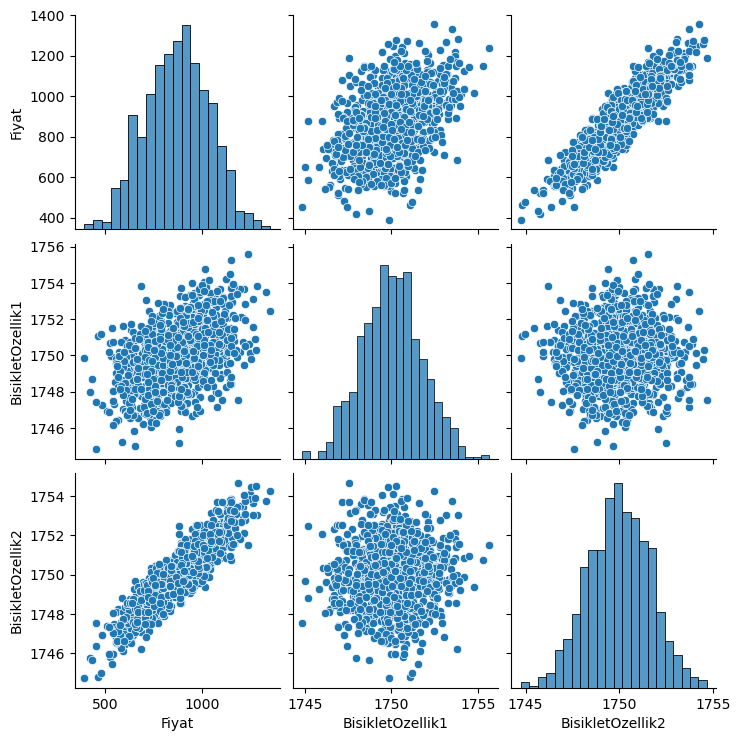

In [3]:
sbn.pairplot(dataFrame)

## Dividing the data into test/train

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Train_Test_Split

In [6]:
# y = wx + b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1", "BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)

In [7]:
x_train.shape

(670, 2)

In [8]:
x_test.shape

(330, 2)

In [9]:
y_train.shape

(670,)

In [10]:
y_test.shape

(330,)

In [11]:
# scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(x_train)

MinMaxScaler()

In [15]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse")

In [20]:
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 658us/step - loss: 795512.8750
Epoch 2/250
21/21 [==============================] - 0s 520us/step - loss: 794836.9375
Epoch 3/250
21/21 [==============================] - 0s 488us/step - loss: 794413.2500
Epoch 4/250
21/21 [==============================] - 0s 486us/step - loss: 793994.1250
Epoch 5/250
21/21 [==============================] - 0s 417us/step - loss: 793549.9375
Epoch 6/250
21/21 [==============================] - 0s 437us/step - loss: 793096.3750
Epoch 7/250
21/21 [==============================] - 0s 439us/step - loss: 792619.8750
Epoch 8/250
21/21 [==============================] - 0s 423us/step - loss: 792107.3750
Epoch 9/250
21/21 [==============================] - 0s 415us/step - loss: 791556.7500
Epoch 10/250
21/21 [==============================] - 0s 434us/step - loss: 790968.8125
Epoch 11/250
21/21 [==============================] - 0s 435us/step - loss: 790339.8125
Epoch 12/250
21/21 [=====================

In [21]:
model.history.history

{'loss': [795512.875,
  794836.9375,
  794413.25,
  793994.125,
  793549.9375,
  793096.375,
  792619.875,
  792107.375,
  791556.75,
  790968.8125,
  790339.8125,
  789659.25,
  788927.625,
  788134.6875,
  787292.0,
  786380.5,
  785400.3125,
  784356.375,
  783239.4375,
  782053.25,
  780789.9375,
  779448.375,
  778016.125,
  776509.75,
  774916.5,
  773214.9375,
  771425.125,
  769537.1875,
  767543.25,
  765444.25,
  763238.6875,
  760922.0,
  758495.25,
  755933.875,
  753247.875,
  750449.1875,
  747508.875,
  744448.9375,
  741232.9375,
  737885.25,
  734404.125,
  730761.0625,
  726997.0625,
  723059.5,
  718958.125,
  714695.625,
  710270.6875,
  705683.0625,
  700925.0,
  695989.375,
  690904.6875,
  685626.625,
  680179.5625,
  674510.875,
  668677.5625,
  662632.5625,
  656454.6875,
  650018.25,
  643463.5625,
  636637.5,
  629625.625,
  622468.9375,
  615086.0625,
  607507.0625,
  599698.5625,
  591711.375,
  583527.9375,
  575096.3125,
  566508.625,
  557735.1875,
  548

<Axes: >

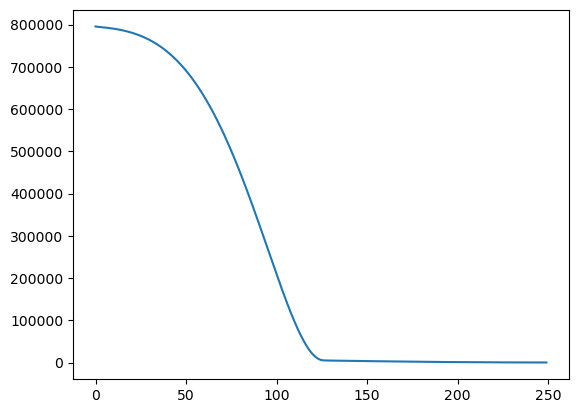

In [22]:
sbn.lineplot(x=range(len(model.history.history["loss"])), y=model.history.history["loss"])

In [23]:
testLoss = model.evaluate(x_test, y_test, verbose=0)
testLoss

99.0949935913086

In [24]:
trainLoss =  model.evaluate(x_train, y_train, verbose=0)
trainLoss

100.78864288330078

In [25]:
testTahminleri = model.predict(x_test)

11/11 [==============================] - 0s 460us/step


In [26]:
testTahminleri

array([[1071.6403 ],
       [ 630.8384 ],
       [ 875.5284 ],
       [ 895.3606 ],
       [ 900.83777],
       [ 467.24493],
       [ 929.74506],
       [ 988.6348 ],
       [ 937.46136],
       [1012.64   ],
       [ 754.0187 ],
       [ 915.02844],
       [ 946.7354 ],
       [1048.8944 ],
       [1112.3376 ],
       [ 687.8308 ],
       [1121.0752 ],
       [ 659.79944],
       [1148.1771 ],
       [ 885.7508 ],
       [ 892.3003 ],
       [ 719.92474],
       [ 467.40228],
       [ 621.9195 ],
       [ 835.2092 ],
       [1083.8492 ],
       [ 719.0988 ],
       [ 761.0173 ],
       [ 874.5922 ],
       [ 774.2177 ],
       [ 464.89017],
       [ 784.8558 ],
       [ 732.87476],
       [ 654.56885],
       [ 886.80646],
       [ 845.0228 ],
       [1030.4899 ],
       [1019.7223 ],
       [ 845.2133 ],
       [ 863.26166],
       [ 760.35864],
       [1166.7222 ],
       [1090.9191 ],
       [1081.1184 ],
       [ 871.22375],
       [ 604.7577 ],
       [1139.8859 ],
       [ 971.

In [27]:
tahminDf = pd.DataFrame(y_test, columns=["Gerçek Y"])

In [28]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [29]:
testTahminleri = pd.Series(testTahminleri.reshape(330,)) 

In [30]:
testTahminleri

0      1071.640259
1       630.838379
2       875.528381
3       895.360596
4       900.837769
          ...     
325    1008.888672
326     794.547241
327     768.379211
328    1158.174194
329     806.822266
Length: 330, dtype: float32

In [31]:
tahminDf = pd.concat([tahminDf, testTahminleri], axis=1)

In [32]:
tahminDf

,Gerçek Y,0
0,1081.652164,1071.640259
1,622.675990,630.838379
2,889.356810,875.528381
3,902.826733,895.360596
4,897.662404,900.837769
...,...,...
325,1028.438035,1008.888672
326,789.934950,794.547241
327,758.490486,768.379211
328,1172.871659,1158.174194


In [33]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [34]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1071.640259
1,622.675990,630.838379
2,889.356810,875.528381
3,902.826733,895.360596
4,897.662404,900.837769
...,...,...
325,1028.438035,1008.888672
326,789.934950,794.547241
327,758.490486,768.379211
328,1172.871659,1158.174194


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

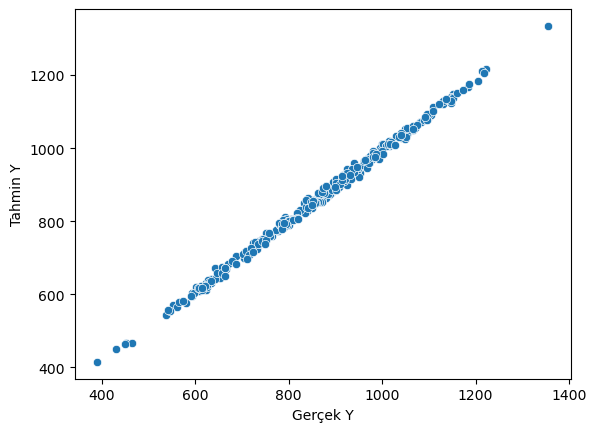

In [35]:
sbn.scatterplot(x="Gerçek Y", y="Tahmin Y", data=tahminDf)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
 mean_absolute_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"])

8.018475715729164

In [38]:
 mean_squared_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"])

99.09498726565258

In [39]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [40]:
yeniBisikletOzellikleri = [[1751, 1750]]

In [41]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [42]:
model.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 13ms/step


array([[912.6418]], dtype=float32)

In [43]:
model.save("bisiklet_modeli.h5")

/Users/batuhansen/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
sonradanCagirilanModel = tf.keras.models.load_model("bisiklet_modeli.h5")

In [48]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

1/1 [==============================] - 0s 34ms/step


array([[912.6418]], dtype=float32)